<a href="https://colab.research.google.com/github/abdullah-Khan-prog/Sign-Language-Detection-Using-YOLOv5/blob/main/Sign_Language_Detection_Using_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Tue Aug 19 12:13:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
%pwd

'/content'

In [5]:
%cd yolov5

/content/yolov5


In [6]:
%pwd

'/content/yolov5'

In [7]:
!pip install -qr requirements.txt
import torch
from IPython.display import Image, clear_output

print("Setup complete. Using torch %s %s " %(torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 2.6.0+cu124 CPU 


In [8]:
%pwd

'/content/yolov5'

In [9]:
%cd /content

/content


In [10]:
!unzip Sign_data.zip

Archive:  Sign_data.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train_df = pd.read_csv("/content/sign_mnist_train.csv")
test_df = pd.read_csv("/content/sign_mnist_test.csv")


X_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values
X_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values


X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (27455, 28, 28, 1)
Test set shape: (7172, 28, 28, 1)


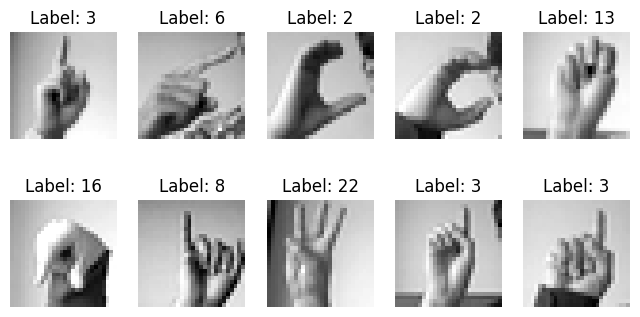

In [12]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(25, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
!pip install --upgrade pip
!pip install --upgrade tensorflow


In [15]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)


Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - accuracy: 0.3023 - loss: 2.4110 - val_accuracy: 0.7153 - val_loss: 0.8606
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8760 - loss: 0.4314 - val_accuracy: 0.8376 - val_loss: 0.4766
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9752 - loss: 0.1302 - val_accuracy: 0.8813 - val_loss: 0.3935
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9961 - loss: 0.0401 - val_accuracy: 0.8858 - val_loss: 0.3708
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9994 - loss: 0.0169 - val_accuracy: 0.8991 - val_loss: 0.3620
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9998 - loss: 0.0098 - val_accuracy: 0.9025 - val_loss: 0.3743
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9025 - val_loss: 0.3773
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 1.0000 - loss: 0.0037 -

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f" Test accuracy: {test_acc*100:.2f}%")


225/225 - 1s - 6ms/step - accuracy: 0.9010 - loss: 0.4000
 Test accuracy: 90.10%


In [17]:
model.save("sign_language_mnist_model.h5")
